<a href="https://colab.research.google.com/github/BrunoPereira1/Topicos-Integradores2/blob/master/Projeto_An%C3%A1lise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
df = pd.read_csv("relatorio-de-multas-implantadas-em-2014.csv", sep=";")

## **ANÁLISE 1**

**As 10 infrações que mais ocorreram no ano de 2014.**

`Tabela`

In [0]:
data = pd.DataFrame(df.infracao.value_counts()[0:10])

In [0]:
data

`Gráfico em Barra`

In [0]:
data.plot.bar(color='black')

## **ANÁLISE 2**

**Os 3 meses que mais tiveram infrações no ano de 2014.**

`Tabela`

In [0]:
df.datainfracao = pd.to_datetime(df.datainfracao)

In [0]:
df.datainfracao.dt.month_name().value_counts()[0:3]

`Gráfico em Barra`

In [0]:
df.datainfracao.dt.month_name().value_counts()[0:3].plot.barh(color='red')

## **ANÁLISE 3**

**Os 3 locais que mais ocorreram infrações no ano de 2014.**



`Tabela`

In [0]:
df.localcometimento.value_counts()[0:3]

`Gráfico em Pizza`

In [0]:
df.localcometimento.value_counts()[0:3].plot.pie()

## **ANÁLISE 4**

**Os 5 horários que mais ocorreram infrações.**

`Tabela`

In [0]:
df.horainfracao.value_counts()[0:5]

`Gráfico em Barra`

In [0]:
df.horainfracao.value_counts()[0:5].plot.bar(color='green')

## **ANÁLISE 5**

**Infrações cometidas por estacionar em desacordo com as condições do local (Zona Azul)**

`Tabela`

In [0]:
data = pd.concat([df.agenteequipamento.value_counts().filter(like="7"),df.agenteequipamento.value_counts().filter(like="2")])

In [0]:
data

`Gráfico em Barra horizontal`

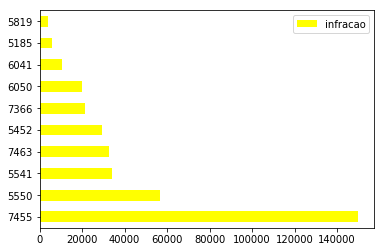

In [15]:
data.plot.barh(color='yellow')

## **ANÁLISE 6**

**Número de infrações cometidas com excesso de velocidade**

`Tabela`

In [0]:
data = df.descricaoinfracao.value_counts().filter(like='Transitar em velocidade superior à máxima')

In [0]:
data

`Gráfico em Pizza`

In [0]:
data.plot.pie()

## **ANÁLISE 7**

**Número de infrações cometidas ao dirigir usando Telefone Celular**

`Tabela`

In [0]:
data = df.descricaoinfracao.value_counts().filter(like='celular')

In [0]:
data

`Gráfico em Barra horizontal`

In [0]:
x = [len(df)]

In [0]:
y = pd.DataFrame(data = x)

In [0]:
z = y.rename(index={0:'Total 2014'})

In [0]:
compare = pd.concat([data,z])

In [0]:
compare.plot.barh(color='blue')

## **ANÁLISE 8**

**Os 5 locais que mais ocorreram infrações no dia 01 de Janeiro de 2014**

`Tabela`

In [0]:
dti = df.loc[df['datainfracao'].isin(['2014-01-01'])]

In [0]:
dti.localcometimento.value_counts()[0:5]

`Gráfico em Pizza`

In [0]:
dti.localcometimento.value_counts()[0:5].plot.pie()

## *INCLUINDO OUTRA DATABASE PARA COMPARAÇÕES TEMPORAIS*

In [0]:
df1 = pd.read_csv("relatorio-de-multas-implantadas-em-2015.csv", sep=";")

In [0]:
df1.datainfracao = pd.to_datetime(df1.datainfracao)

## **ANÁLISE 9**

**Comparando se cresceu ou diminuiu o número de infrações por excesso de velocidade do mês de Janeiro 2014 para o mês de Janeiro de 2015**

*Preparando Database 2014*

In [0]:
df2014 = df.loc[df.datainfracao.dt.month_name()== 'January']

In [0]:
df2014TotSemNome = df2014.datainfracao.dt.month_name().value_counts()

In [0]:
df2014Tot = df2014TotSemNome.rename(index={'January':'January 2014'})

*Preparando Database 2015*

In [0]:
df2015 = df1.loc[df1.datainfracao.dt.month_name()== 'January']

In [0]:
df2015TotSemNome = df2015.datainfracao.dt.month_name().value_counts()

In [0]:
df2015Tot = df2015TotSemNome.rename(index={'January':'January 2015'})

`Tabela`

In [0]:
data = pd.concat([df2014Tot,df2015Tot])

In [0]:
data

Gráfico e Barra

In [0]:
data.plot.bar()

## **ANÁLISE 10**

**Crescimento ou Diminuição da quantidade de infrações de 2014 para 2015**

*Preparando DataFrame 2014*

In [0]:
TotX = [len(df)]

In [0]:
Tot2014SemNome = pd.DataFrame(data = TotX)

In [0]:
Tot2014 = Tot2014SemNome.rename(index={0:'Total 2014'})

*Preparando DataFrame 2015*

In [0]:
TotY = [len(df1)]

In [0]:
Tot2015SemNome = pd.DataFrame(data = TotY)

In [0]:
Tot2015 = Tot2015SemNome.rename(index={0:'Total 2015'})

`Tabela`

In [0]:
data = pd.concat([Tot2014,Tot2015])

In [0]:
data

`Gráfico em Barra horizontal`

In [0]:
data.plot.barh(color='red')

***Porcentagem de Crescimento***

In [0]:
Val = Tot2015[0][0] - Tot2014[0][0]

In [0]:
PcentTot = Val/Tot2014[0][0]*100

In [0]:
PcentAbrev = round(PcentTot,2)

In [0]:
x = [PcentAbrev]

In [0]:
data1SemNome = pd.DataFrame(data = x)

In [0]:
data1 = data1SemNome.rename(index={0:'Crescimento(%)'})

`Tabela`

In [0]:
data1

`Gráfico em Linha`

In [0]:
data1.plot.bar(color='violet')